In [2]:
import pyvisa as visa
import sys
from qcodes_contrib_drivers.drivers.Tektronix.AFG3000_test import AFG3000

from typing import Any, Tuple, Sequence, cast

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from qcodes import VisaInstrument
import qcodes.utils.validators as vals
from qcodes.utils.helpers import create_on_off_val_mapping

In [2]:
rm = visa.ResourceManager()
AFG = rm.open_resource('USB0::0x0699::0x034A::C012667::INSTR')
AFG.query('*IDN?')

'TEKTRONIX,AFG3022C,C012667,SCPI:99.0 FV:1.0.9\n'

In [3]:
AFG = AFG3000(name= 'AFG', address= 'USB0::0x0699::0x034A::C012667::INSTR')

Connected to: TEKTRONIX AFG3022C (serial:C012667, firmware:SCPI:99.0 FV:1.0.9) in 1.69s


# Set up triggering

In [11]:
AFG.burst_mode_on(cycles= 2, delay = 0, src= 1)
AFG.burst_mode_on(cycles= 2, delay = 0, src= 2)

In [9]:
AFG.burst_mode_off(src= 1)
AFG.burst_mode_off(src= 2)

# Send CPMG pulse sequence

In [2]:
def rest(wf, wf2, num_restpoints):
    for i in range(num_restpoints):
        wf.append(0)
        wf2.append(0)

def pix(wf, wf2, rabi):
    for i in range(int(rabi/2)):
        wf.append(1)
        wf2.append(0)

def pi_2y(wf, wf2, rabi):
    for i in range(int(rabi/4)):
        wf.append(1)
        wf2.append(0)

rabi = 500
tau = 100
buffer = tau
numcpmg = 2
psperiod = 2*buffer + numcpmg*tau + (numcpmg+1)*rabi/2

cpmgch1 = []
cpmgch2 = []

rest(cpmgch1, cpmgch2, int(buffer))
pi_2y(cpmgch1, cpmgch2, rabi)
rest(cpmgch1, cpmgch2, int(tau/2))

for i in range(numcpmg):
    pix(cpmgch2, cpmgch1, rabi)
    if i<(numcpmg-1):
        rest(cpmgch1, cpmgch2, int(tau))

rest(cpmgch1, cpmgch2, int(tau/2))
pi_2y(cpmgch1, cpmgch2, rabi)
rest(cpmgch1, cpmgch2, int(buffer))
print(psperiod)

cpmgch1_off = cpmgch2[int(tau/2):int(psperiod)]
for i in range(int(tau/2)):
    cpmgch1_off.append(0)
print(cpmgch2)

1150.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

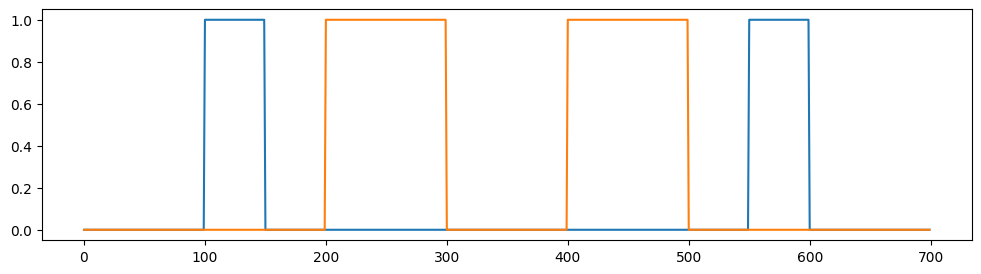

In [20]:
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(cpmgch1)
ax.plot(cpmgch2)


In [3]:
print(cpmgch2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [30]:
AFG.upload_waveform(waveform= cpmgch2, memory= 1)
AFG.upload_waveform(waveform= cpmgch2, memory= 2)

In [32]:
AFG.set_freq(freq= (1000/psperiod), src= 1)
AFG.set_freq(freq= (1000/psperiod), src= 2)
AFG.set_high(highamp= 4.983, src=1)
AFG.set_high(highamp= 4.980, src=2)
AFG.set_low(lowamp= 0.003, src=1)
AFG.set_low(lowamp= 0.01, src=2)
AFG.synchronize_phase(src= 1)

# Send XY8 pulse sequence

# Voltage test

In [4]:
num_points = 1000

high = np.ones(num_points)
low = np.zeros(num_points)

In [76]:
square1 = []
for i in range(600):
    square1.append(0)

for i in range(100):
    square1.append(1)

for i in range(300):
    square1.append(0)

In [77]:
square2 = []
for i in range(450):
    square2.append(0)

for i in range(100):
    square2.append(1)

for i in range(450):
    square2.append(0)

In [78]:
AFG.upload_waveform(waveform= square1, memory= 1)
AFG.upload_waveform(waveform= square2, memory= 2)

In [4]:
AFG.set_high(highamp= 4.983, src=1)
AFG.set_high(highamp= 4.980, src=2)
AFG.set_low(lowamp= 0.003, src=1)
AFG.set_low(lowamp= 0.01, src=2)

In [24]:
AFG.set_freq(freq= (1000/80), src= 1)
AFG.set_freq(freq= (1000/80), src= 2)
AFG.synchronize_phase(src= 2)